# Yolo Pretrained test modello preallenato

Nota:
- Attualmente YOLO usa pesi pre-addestrati su COCO (80 classi)
- Per LineMOD (13 oggetti specifici) fine-tuning necessario (notebook successivo)
- Obiettivo notebook: usare yolo pre addestrato


> Esecuzione di Yolo pre-allenato sul dataset linemod. 
> Ci si aspetta che senza alcun fine tuning i risultati siano scarsi

## 1. Import e Setup

In [1]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import yaml

# Importa il config per usare path e file in altre cartelle
sys.path.insert(0, str(Path.cwd().parent))  # Aggiungi parent al path
from config import Config
from models.yolo_detector import YOLODetector, visualize_detections

# Usa PROJECT_ROOT dal config
project_root = Config.PROJECT_ROOT
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print(f"📂 Project root: {project_root}")
print(f"🎯 Number of classes: {Config.NUM_CLASSES}")
print(f"📦 YOLO model: {Config.YOLO_MODEL}")

📂 Project root: /Users/nicolotermine/zMellow/GitHub-Poli/Polito/polito-aml-6D_pose_estimation
🎯 Number of classes: 13
📦 YOLO model: yolo11n


## 2. Inizializza il Modello YOLO

**Nota**: I pesi pre-addestrati YOLO saranno scaricati automaticamente e salvati in `checkpoints/pretrained/` invece che nella directory principale del progetto.

In [ ]:
# Crea il detector (usa automaticamente Config.DEVICE)
detector = YOLODetector(
    model_name=Config.YOLO_MODEL,
    pretrained=True,  # Usa i pesi pre-addestrati su COCO
    num_classes=80
)

# Mostra info sul modello
print(f"\n📊 Model Info:")
for key, value in detector.model_info.items():
    print(f"   {key}: {value}")

✅ Loading pretrained yolo11n from cache: /Users/nicolotermine/zMellow/GitHub-Poli/Polito/polito-aml-6D_pose_estimation/checkpoints/pretrained/yolo11n.pt
⚠️  WARNING: Using COCO pretrained weights (80 classes) for 13 classes
   You'll need to fine-tune or retrain for your custom dataset

📊 Model Info:
   model_name: yolo11n
   num_classes: 13
   device: mps
   parameters: 2624080
   trainable_parameters: 0


## 3. Test su Immagine Singola del Dataset

📋 Ground Truth - 1 objects
   Object ID: 1, BBox: [244, 150, 44, 58]

📷 Immagine caricata: /Users/nicolotermine/zMellow/GitHub-Poli/Polito/polito-aml-6D_pose_estimation/data/Linemod_preprocessed/data/01/rgb/0000.png
   Shape: (480, 640, 3)


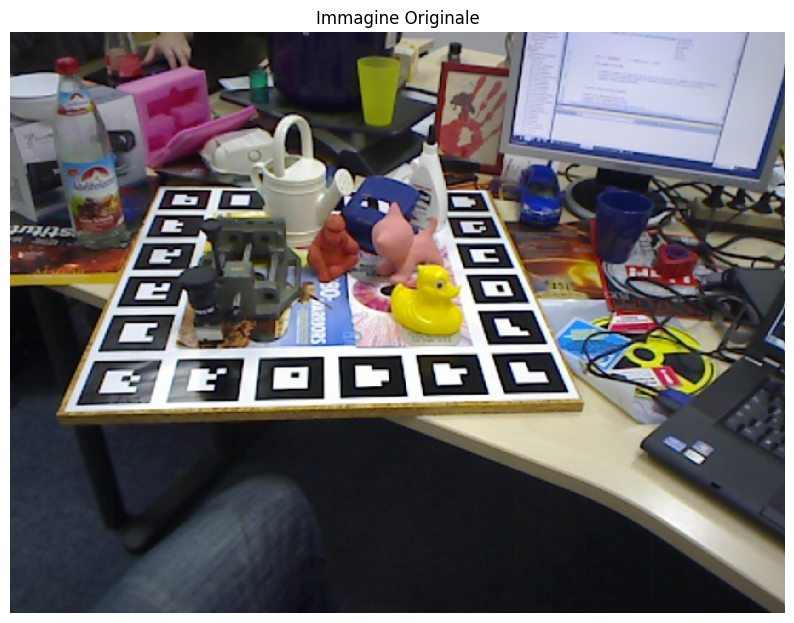

In [ ]:
# Carica un'immagine dal dataset
dataset_root = Config.LINEMOD_ROOT
sample_img_path = dataset_root / 'data' / '01' / 'rgb' / '0000.png'
sample_gt_path = dataset_root / 'data' / '01' / 'gt.yml'

if sample_img_path.exists():
    # Carica immagine
    image = Image.open(sample_img_path).convert('RGB')
    
    # Carica ground truth per confronto
    gt_data = None
    if sample_gt_path.exists():
        with open(sample_gt_path, 'r') as f:
            gt_data = yaml.safe_load(f)
            if 0 in gt_data:  # Image ID 0
                print(f"📋 Ground Truth - {len(gt_data[0])} objects")
                for obj in gt_data[0]:
                    print(f"   Object ID: {obj['obj_id']}, BBox: {obj['obj_bb']}")
    
    print(f"\n📷 Immagine caricata: {sample_img_path}")
    print(f"   Shape: {image.shape}")
    
    # Visualizza immagine originale
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title("Immagine Originale")
    plt.axis('off')
    plt.show()
else:
    print(f"❌ Immagine non trovata: {sample_img_path}")
    print("   Assicurati di aver scaricato il dataset con il notebook local_dataset_test.ipynb")

## 4. Esegui Detection

In [4]:
if sample_img_path.exists():
    # Esegui detection
    print("\n🔍 Running object detection...")
    detections = detector.detect_objects(
        image=image,
        conf_threshold=Config.YOLO_CONF_THRESHOLD
    )
    
    # Mostra risultati
    print(f"\n📦 Detected {len(detections)} objects:")
    for i, det in enumerate(detections):
        print(f"\n   Object {i+1}:")
        print(f"      Class: {det['class_name']} (ID: {det['class_id']})")
        print(f"      Confidence: {det['confidence']:.3f}")
        print(f"      BBox [x1,y1,x2,y2]: {det['bbox']}")


🔍 Running object detection...

📦 Detected 8 objects:

   Object 1:
      Class: cup (ID: 41)
      Confidence: 0.774
      BBox [x1,y1,x2,y2]: [     284.81       18.69      326.29      80.167]

   Object 2:
      Class: tv (ID: 62)
      Confidence: 0.680
      BBox [x1,y1,x2,y2]: [     408.21      1.9985      639.76      127.93]

   Object 3:
      Class: bottle (ID: 39)
      Confidence: 0.571
      BBox [x1,y1,x2,y2]: [     36.485      35.229       94.81      175.85]

   Object 4:
      Class: cup (ID: 41)
      Confidence: 0.543
      BBox [x1,y1,x2,y2]: [      481.6      128.14      532.28      193.67]

   Object 5:
      Class: remote (ID: 65)
      Confidence: 0.536
      BBox [x1,y1,x2,y2]: [     518.53         310      639.39      422.37]

   Object 6:
      Class: cup (ID: 41)
      Confidence: 0.426
      BBox [x1,y1,x2,y2]: [     203.35      103.17       270.6      179.83]

   Object 7:
      Class: person (ID: 0)
      Confidence: 0.343
      BBox [x1,y1,x2,y2]: [     1.0

## 5. Visualizza Detections

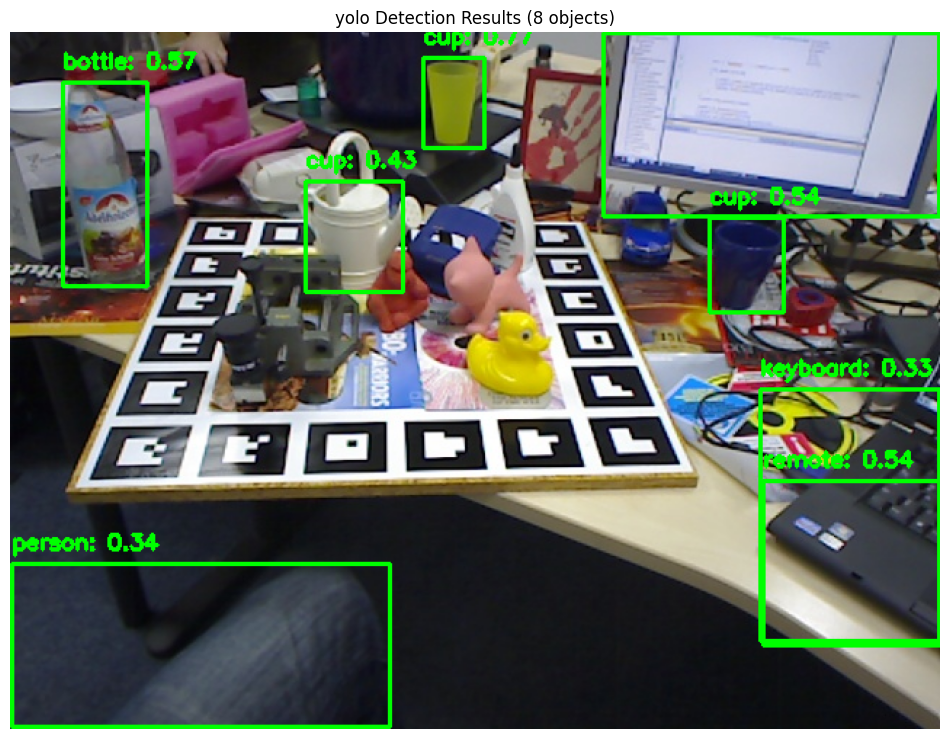

In [5]:
if sample_img_path.exists() and len(detections) > 0:
    # Visualizza detections
    vis_image = visualize_detections(image, detections)
    
    # Mostra risultato
    plt.figure(figsize=(12, 12))
    plt.imshow(vis_image)
    plt.title(f"yolo Detection Results ({len(detections)} objects)")
    plt.axis('off')
    plt.show()
elif sample_img_path.exists():
    print("⚠️  Nessun oggetto rilevato. Prova ad abbassare il conf_threshold.")

## 6. Test su Multiple Immagini

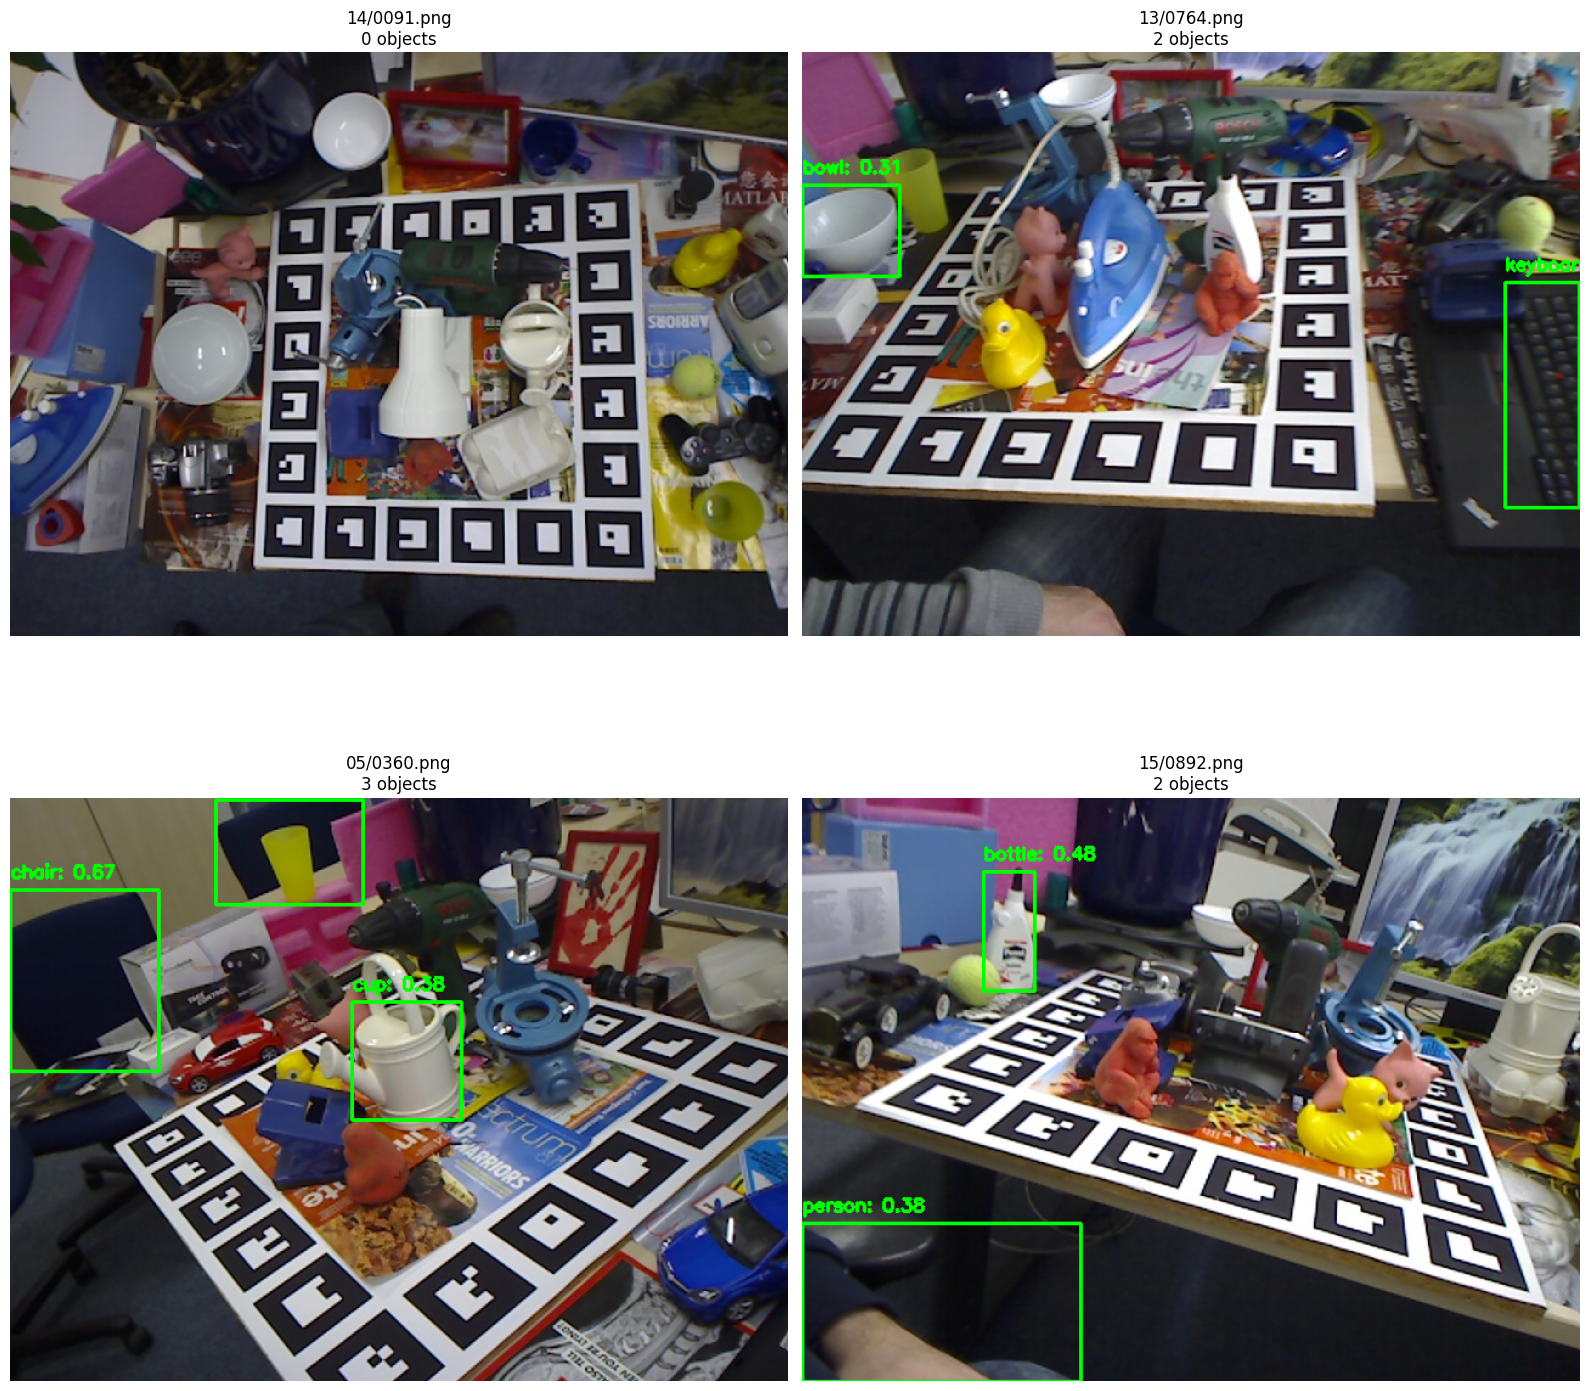

In [ ]:
# Test su più immagini
import random

# Trova tutte le immagini RGB
rgb_images = list((dataset_root / 'data').rglob('rgb/*.png'))

if len(rgb_images) > 0:
    # Seleziona 4 immagini random
    sample_images = random.sample(rgb_images, min(4, len(rgb_images)))
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 16))
    axes = axes.flatten()
    
    for idx, img_path in enumerate(sample_images):
        # Carica e processa immagine
        img_RGB = np.array(Image.open(img_path).convert('RGB'))
        img_BGR = img_RGB[..., ::-1]
        dets = detector.detect_objects(img_BGR, conf_threshold=0.3)
        
        # Visualizza
        vis_img = visualize_detections(img_RGB, dets)
        axes[idx].imshow(vis_img)
        axes[idx].set_title(f"{img_path.parent.parent.name}/{img_path.name}\n{len(dets)} objects")
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("❌ Nessuna immagine trovata nel dataset")